In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.9.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.9.2 on the current Colab Runtime...
2023-08-29 10:15:14 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.9/julia-1.9.2-linux-x86_64.tar.gz [146384758/146384758] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.9

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


In [ ]:
using Pkg

In [ ]:
Pkg.add(["CSV","LaTeXStrings","Interpolations","PyPlot","DataFrames","LinearAlgebra","SpecialFunctions","DifferentialEquations"]);

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed TreeViews ──────────────────────── v0.3.0
   Installed Calculus ───────────────────────── v0.5.1
   Installed PDMats ─────────────────────────── v0.11.17
   Installed StatsFuns ──────────────────────── v1.3.0
   Installed OffsetArrays ───────────────────── v1.12.10
   Installed InlineStrings ──────────────────── v1.4.0
   Installed DifferentialEquations ──────────── v7.9.0
   Installed HypergeometricFunctions ────────── v0.3.23
   Installed NonlinearSolve ─────────────────── v1.9.0
   Installed Sundials_jll ───────────────────── v5.2.1+0
   Installed EnumX ──────────────────────────── v1.0.4
   Installed Polyester ──────────────────────── v0.7.5
   Installed InvertedIndices ────────────────── v1.3.0
   Installed StaticArrays ───────────────────── v1.6.2
   Installed RecursiveArrayTools ────────────── v2.38.7
   Installed DataFrames ─────────────────────── v1.6.1
   Installed Functi

In [ ]:
using CSV
using DataFrames

In [ ]:
df=DataFrame(CSV.File("/content/SM_Thermo.csv"));

In [ ]:
df[!,"z_gam"];

In [ ]:
z_gam=df[!,"z_gam"]
z_nu=df[!,"z_nu"]
gs=df[!,"gs"]
g=df[!,"g*"];

In [ ]:
z_g = (1.0 ./ z_gam) .* df[!,"a"]
m_e=0.51099895;

In [ ]:
cons = 4.84 / m_e^2

18.535544404595054

In [ ]:

function gprime_s(df)
    x = Float64[]  # Create an empty array to store the results
    for i in 1:1000  # Julia uses 1-based indexing instead of 0-based
        if z_g[i+1] != z_g[i]
            push!(x, (gs[i+1] - gs[i]) / (z_g[i+1] - z_g[i]))
        else
            push!(x, x[i])
        end
    end

    return x
end

gprime_list = gprime_s(df)
push!(gprime_list, 0.0);


In [ ]:
function my_function(cons, z_g, gprime_list, df)
    z_g_val = -(z_g^2) * (1/3) * gprime_list ./ df["gs"]
    return cons * (z_g_val + z_g) / sqrt(df["g*"])
end


my_function (generic function with 1 method)

In [ ]:
using Base

z_int = sort(z_g);

In [ ]:
# Calculating 'func'
func = cons .* (-(z_int .^ 2) .* (1 ./ 3) .* (gprime_list ./ df[:, "gs"]) .+ z_int) ./ (sqrt.(df[:, "g*"]))

println(func)


[0.2890870897031636, 0.2917621621238856, 0.2944629683589648, 0.29718877486890105, 0.29993780101143164, 0.3027142916534476, 0.305516504821838, 0.30834255789981657, 0.3111979259969265, 0.31407654166188237, 0.31698396285678365, 0.31991827208868007, 0.3228786668811081, 0.32586646910566286, 0.3288830337355799, 0.331926378768886, 0.33499904336046304, 0.3380990096964893, 0.3412288248491617, 0.3443864494827104, 0.34757331590619905, 0.3507920284891287, 0.35403697015051283, 0.35731437011515527, 0.36062208546558877, 0.3639604347796593, 0.3673284693593711, 0.370727688191827, 0.3741595915753541, 0.3776232725282887, 0.38111779810178337, 0.3846459438435631, 0.38820669940783503, 0.3917991894846176, 0.39542621597155325, 0.39908683296930797, 0.40278000766282807, 0.4065087357031785, 0.410271965816205, 0.41407008591744704, 0.4179019605712661, 0.42177070755522056, 0.42567526723964366, 0.4296160026712797, 0.43359177342605154, 0.4376058360269647, 0.44165855723064057, 0.4457458056950143, 0.44987241764780905, 

In [ ]:
using Interpolations
# Interpolate using Interpolations package
dt_dz = LinearInterpolation(z_int, func, extrapolation_bc=Line())  # Linear interpolation

# Create new x values
x_new = range(0.051099997600057595, stop=511.0000145934898, length=100000)

# Evaluate the interpolation at x_new values
dtdz_new = dt_dz(x_new);


In [ ]:
using PyPlot


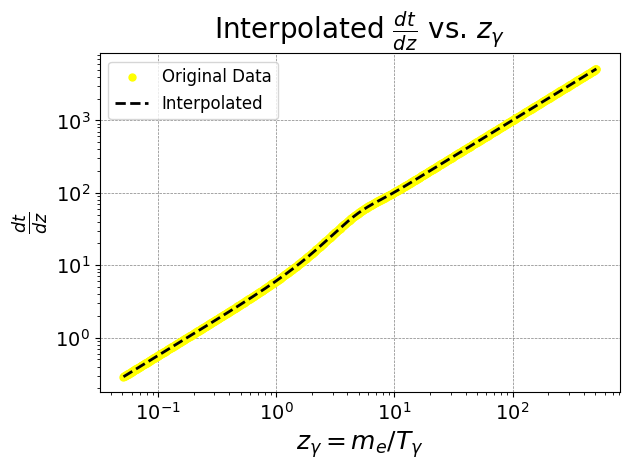

PyObject <matplotlib.legend.Legend object at 0x782f1e9057e0>

In [ ]:
plot(z_int, func, "o", color="yellow", markersize=5, label="Original Data")
plot(x_new, dtdz_new, "--", color="black", linewidth=2, label="Interpolated")
xscale("log")
yscale("log")
xlabel(L"$z_\gamma=m_e/T_\gamma$", fontsize=18)
ylabel(L"$\frac{dt}{dz}$", fontsize=18)
title(L"Interpolated $\frac{dt}{dz}$ vs. $z_{\gamma}$", fontsize=20)
grid(true, linestyle="--", linewidth=0.5, color="gray")
tick_params(axis="both", which="major", labelsize=14)
tight_layout()
legend(fontsize=12)

In [ ]:
a_0 = 1
a_1 = 0.15735
a_2 = 4.6172
a_3 = -0.40520e2
a_4 = 0.13875e3
a_5 = -0.59898e2
a_6 = 0.66752e2
a_7 = -0.16705e2
a_8 = 3.8071
a_9 = -0.39140
a_10 = 0.023590
a_11 = -0.83696e-4
a_12 = -0.42095e-4
a_13 = 0.17675e-5
q_np = 0.33979

b_0 = -0.62173
b_1 = 0.22211e2
b_2 = -0.72798e2
b_3 = 0.11571e3
b_4 = -0.11763e2
b_5 = 0.45521e2
b_6 = -3.7973
b_7 = 0.41266
b_8 = -0.026210
b_9 = 0.87934e-3
b_10 = -0.12016e-4
q_pn = 2.8602
tau = 8.7945e2
m_e = 0.511

a_values = [a_1, a_2, a_3, a_4, a_5, a_6, a_7, a_8, a_9, a_10, a_11, a_12, a_13]
b_values = [b_1, b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_9, b_10]


10-element Vector{Float64}:
  22.211
 -72.798
 115.71
 -11.763
  45.521
  -3.7973
   0.41266
  -0.02621
   0.00087934
  -1.2016e-5

In [ ]:
using Base

z_int = sort(z_g);


In [ ]:
znu = []
for x in z_int
    if (1 / x) * m_e >= 0.01
        push!(znu, x)
    end
end


In [ ]:


# Define the weak rate function for n <--> p
function lambda_np(z)
    f1 = 1.0
    for ie in 1:13
        f1 += a_values[ie] / z^ie
    end
    f1 *= exp(-0.33979 / z) / tau
    return f1
end

# Define the weak rate function for p <--> n
function lambda_pn(z)
    r1 = -0.62173
    e = m_e / z

    if (e >= 0.1)
        for ie in 1:10
            r1 += b_values[ie] / z^ie
        end
        r1 *= exp(-2.8602 * z) / tau
        weak_rate = r1
    else
        weak_rate = 0
    end
    return weak_rate
end


lambda_pn (generic function with 1 method)

In [ ]:
function f1(z, xn, xp)
    value = (lambda_pn(z) * xp - lambda_np(z) * xn) * dt_dz(z)
    return value
end

function f2(z, xn, xp)
    value = (lambda_np(z) * xn - lambda_pn(z) * xp) * dt_dz(z)
    return value
end

f2 (generic function with 1 method)

In [ ]:
Pkg.add("DifferentialEquations")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [ ]:
using DifferentialEquations

In [ ]:
function ode_solvez(u, p, z)
    xn, xp = u
    dx_n = f1(z,u[1],u[2])  # Define the equation for dx/dt here based on x, y, and t
    dx_p = f2(z,u[1],u[2])
    [dx_n,dx_p] # Define the equation for dy/dt here based on x, y, and t
end


ode_solvez (generic function with 1 method)

In [ ]:
using DifferentialEquations, BenchmarkTools
u0 = [0.46771996026; 0.53228003974]
tspan = (minimum(znu),maximum(znu))
prob = ODEProblem(ode_solvez, u0, tspan)
@btime solve(prob, Rodas5P());


  2.420 ms (100166 allocations: 2.15 MiB)


In [ ]:
sol = solve(prob,Rodas5P())  # You can choose a different solver if needed

retcode: Success
Interpolation: specialized 4rd order "free" stiffness-aware interpolation
t: 46-element Vector{Float64}:
  0.051099997600057595
  0.0546681296956382
  0.056244862843864186
  0.059198346267329525
  0.06440245638110617
  0.07079124048945204
  0.07827398053709227
  0.08885983536121765
  0.10296901942572104
  0.12041307919252538
  0.13974487722216225
  0.16491753270712786
  0.19012320104445138
  ⋮
  8.190020679500043
 10.698871974157646
 13.59763211863316
 17.60391630648862
 21.610200494344085
 25.715031769229224
 29.819863044114364
 33.9246943189995
 38.20977352534001
 43.38007305614728
 49.66763040558041
 50.63151395438075
u: 46-element Vector{Vector{Float64}}:
 [0.46771996026, 0.53228003974]
 [0.46268149359305316, 0.5373185064069471]
 [0.4617833790428394, 0.5382166209571608]
 [0.4601549498139236, 0.5398450501860766]
 [0.45722668769101454, 0.5427733123089858]
 [0.45349553495754813, 0.5465044650424524]
 [0.4490540160336419, 0.5509459839663585]
 [0.44278640299038496, 0.557

In [ ]:
z_values = sol.t
xn_values = sol[1, :]
xp_values = sol[2, :]

46-element Vector{Float64}:
 0.53228003974
 0.5373185064069471
 0.5382166209571608
 0.5398450501860766
 0.5427733123089858
 0.5465044650424524
 0.5509459839663585
 0.5572135970096156
 0.5655848233273594
 0.5760350505372505
 0.5875473603419642
 0.6021215485977696
 0.6161809163174726
 ⋮
 0.8887159192554404
 0.9155835166363424
 0.9436724052026735
 0.9724608926040965
 0.9887887148616002
 0.9963093384969534
 0.9989981282730002
 0.9997757837258517
 0.9999617935198275
 0.9999966229426862
 0.9999998931589046
 0.9999999385255235

In [ ]:
xn_h=xn_values ./ xp_values

46-element Vector{Float64}:
 0.8787103128805368
 0.861093537773355
 0.8579879570081038
 0.8523833823340882
 0.8423897736348688
 0.8298112164963202
 0.8150599679497106
 0.7946439307415968
 0.768081388954107
 0.7360054723533423
 0.7019904564254721
 0.6607942405130944
 0.6228999852452014
 ⋮
 0.1252189572994189
 0.0921996539144641
 0.05968977633210563
 0.028318987020814194
 0.011338403209800509
 0.003704332942031759
 0.0010028764805928183
 0.00022426655836173487
 3.820793996466755e-5
 3.3770687196919026e-6
 1.0684110826521854e-7
 6.147448174950856e-8

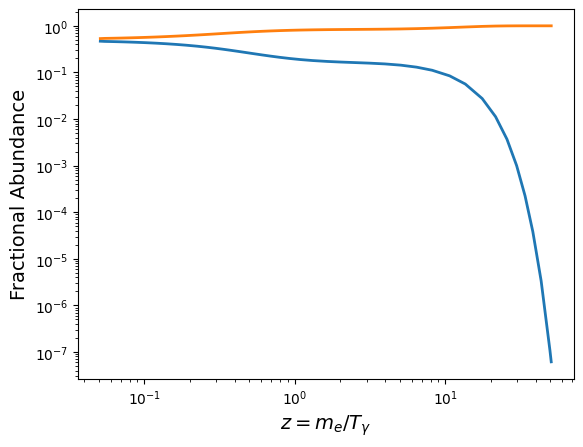

PyObject Text(29.000000000000014, 0.5, 'Fractional Abundance')

In [ ]:
plot(z_values, xn_values, linewidth=2, label=L"$p$")
plot(z_values, xp_values, linewidth=2, label=L"$n$")
yscale("log")
xscale("log")
xlabel(L"$z=m_e/T_\gamma$", fontsize=14)
ylabel("Fractional Abundance", fontsize=14)

In [ ]:
function mev_to_t9kelvin(mev)
    temp9_kelvin = mev * 11604525006.1598 / 10^9
    return temp9_kelvin
end


mev_to_t9kelvin (generic function with 1 method)

In [ ]:
const NA=6.022e23

6.022e23

In [ ]:
eta_s=6.14e-10

6.14e-10

In [ ]:
function n_b(z)
    T_mev = m_e / z
    T_kelvin = T_mev * 11604525006.1598
    n_bz = eta_s * 410.73 * (T_kelvin / 2.7255)^3
    return n_bz
end

n_b (generic function with 1 method)

In [ ]:
function pn_gammaD(z)
    T = m_e / z
    T_9 = mev_to_t9kelvin(T)
    if T_9 <= 1.5
        f = (44216. * (1 + 3.75191 * T_9 + 1.92934 * T_9^2 + 0.746503 * T_9^3 + 0.0197023 * T_9^4 + 3.00491e-6 * T_9^5) /
             (1 + 5.4678 * T_9 + 5.62395 * T_9^2 + 0.489312 * T_9^3 + 0.00747806 * T_9^4))
    else
        f = (1.0 - sqrt(T_9) * 0.8504 + T_9 * 0.4895 - T_9^(3/2) * 0.09623 + T_9 * 0.008471 * T_9 - T_9 * 2.8e-4 * T_9^(3/2)) * 47420.0
    end
    result = f
    return n_b(z) * (result / NA)
end


function Dp_gamma3He(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)
    if T9 < 0.001
        rate = 4.815e-14
    elseif 0.001 <= T9 <= 0.0015
        rate = 4.815e-14
    elseif 0.0015 < T9 <= 0.0025
        rate = 6.409e-9
    elseif 0.0025 < T9 <= 0.0035
        rate = 4.525e-7
    elseif 0.0035 < T9 <= 0.0045
        rate = 4.896e-6
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.444e-5
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.086e-5
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.078e-4
    elseif 0.0075 < T9 <= 0.0085
        rate = 4.499e-4
    elseif 0.0085 < T9 <= 0.0095
        rate = 8.619e-4
    elseif 0.0095 < T9 <= 0.0105
        rate = 1.506e-3
    elseif 0.0105 < T9 <= 0.0115
        rate = 2.450e-3
    elseif 0.0115 < T9 <= 0.0125
        rate = 3.767e-3
    elseif 0.0125 < T9 <= 0.0135
        rate = 5.531e-3
    elseif 0.0135 < T9 <= 0.0145
        rate = 7.816e-3
    elseif 0.0145 < T9 <= 0.0155
        rate = 1.070e-2
    elseif 0.0155 < T9 <= 0.0170
        rate = 1.425e-2
    elseif 0.0170 < T9 <= 0.0190
        rate = 2.366e-2
    elseif 0.0190 < T9 <= 0.0225
        rate = 3.659e-2
    elseif 0.0225 < T9 <= 0.0275
        rate = 8.753e-2
    elseif 0.0275 < T9 <= 0.0350
        rate = 1.701e-1
    elseif 0.0350 < T9 <= 0.0450
        rate = 4.476e-1
    elseif 0.0450 < T9 <= 0.0550
        rate = 8.915e-1
    elseif 0.0550 < T9 <= 0.0650
        rate = 1.510
    elseif 0.0650 < T9 <= 0.0750
        rate = 2.302
    elseif 0.0750 < T9 <= 0.0850
        rate = 3.265
    elseif 0.0850 < T9 <= 0.0950
        rate = 4.392
    elseif 0.0950 < T9 <= 0.1050
        rate = 5.676
    elseif 0.1050 < T9 <= 0.1150
        rate = 7.109
    elseif 0.1150 < T9 <= 0.1250
        rate = 8.685
    elseif 0.1250 < T9 <= 0.1350
        rate = 1.040e1
    elseif 0.1350 < T9 <= 0.1450
        rate = 1.224e1
    elseif 0.1450 < T9 <= 0.1550
        rate = 1.420e1
    elseif 0.1550 < T9 <= 0.1700
        rate = 1.628e1
    elseif 0.1700 < T9 <= 0.1900
        rate = 2.076e1
    elseif 0.1900 < T9 <= 0.2250
        rate = 2.565e1
    elseif 0.2250 < T9 <= 0.2750
        rate = 3.941e1
    elseif 0.2750 < T9 <= 0.3250
        rate = 5.505e1
    elseif 0.3250 < T9 <= 0.3750
        rate = 7.225e1
    elseif 0.3750 < T9 <= 0.4250
        rate = 9.076e1
    elseif 0.4250 < T9 <= 0.4750
        rate = 1.104e2
    elseif 0.4750 < T9 <= 0.5500
        rate = 1.310e2
    elseif 0.5500 < T9 <= 0.6500
        rate = 1.748e2
    elseif 0.6500 < T9 <= 0.7500
        rate = 2.212e2
    elseif 0.7500 < T9 <= 0.8500
        rate = 2.700e2
    elseif 0.8500 < T9 <= 0.9500
        rate = 3.207e2
    elseif 0.9500 < T9 <= 1.1250
        rate = 3.729e2
    elseif 1.1250 < T9 <= 1.3750
        rate = 5.093e2
    elseif 1.3750 < T9 <= 1.6250
        rate = 6.522e2
    elseif 1.6250 < T9 <= 1.8750
        rate = 8.000e2
    elseif 1.8750 < T9 <= 2.2500
        rate = 9.517e2
    elseif 2.2500 < T9 <= 2.7500
        rate = 1.265e3
    elseif 2.7500 < T9 <= 3.2500
        rate = 1.587e3
    elseif 3.2500 < T9 <= 3.7500
        rate = 1.914e3
    elseif 3.7500 < T9 <= 4.5000
        rate = 2.244e3
    elseif 4.5000 < T9 <= 5.5000
        rate = 2.905e3
    elseif 5.5000 < T9 <= 6.5000
        rate = 3.557e3
    elseif 6.5000 < T9 <= 7.5000
        rate = 4.194e3
    elseif 7.5000 < T9 <= 8.5000
        rate = 4.812e3
    elseif 8.5000 < T9 <= 9.5000
        rate = 5.410e3
    elseif 9.5000 < T9 <= 10.0000
        rate = 5.988e3
    else
        rate = 0.0
    end
    return (n_b(z)*rate / NA)
end



function DD_n3He(z)
    T9 = mev_to_t9kelvin(m_e / z)
    if T9 < 0.001
        rate = 1.142e-8
    elseif 0.001 <= T9 <= 0.0015
        rate = 1.142e-8
    elseif 0.0015 < T9 <= 0.0025
        rate = 5.470e-5
    elseif 0.0025 < T9 <= 0.0035
        rate = 3.021e-3
    elseif 0.0035 < T9 <= 0.0045
        rate = 3.732e-2
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.212e-1
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.546e-1
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.505
    elseif 0.0075 < T9 <= 0.0085
        rate = 6.066
    elseif 0.0085 < T9 <= 0.0095
        rate = 1.278e1
    elseif 0.0095 < T9 <= 0.0105
        rate = 2.424e1
    elseif 0.0105 < T9 <= 0.0115
        rate = 4.237e1
    elseif 0.0115 < T9 <= 0.0125
        rate = 6.936e1
    elseif 0.0125 < T9 <= 0.0135
        rate = 1.077e2
    elseif 0.0135 < T9 <= 0.0145
        rate = 1.600e2
    elseif 0.0145 < T9 <= 0.0155
        rate = 2.291e2
    elseif 0.0155 < T9 <= 0.0170
        rate = 3.179e2
    elseif 0.0170 < T9 <= 0.0190
        rate = 5.667e2
    elseif 0.0190 < T9 <= 0.0225
        rate = 9.310e2
    elseif 0.0225 < T9 <= 0.0275
        rate = 2.504e3
    elseif 0.0275 < T9 <= 0.0350
        rate = 5.301e3
    elseif 0.0350 < T9 <= 0.0450
        rate = 1.568e4
    elseif 0.0450 < T9 <= 0.0550
        rate = 3.369e4
    elseif 0.0550 < T9 <= 0.0650
        rate = 6.013e4
    elseif 0.0650 < T9 <= 0.0750
        rate = 9.527e4
    elseif 0.0750 < T9 <= 0.0850
        rate = 1.390e5
    elseif 0.0850 < T9 <= 0.0950
        rate = 1.912e5
    elseif 0.0950 < T9 <= 0.1050
        rate = 2.513e5
    elseif 0.1050 < T9 <= 0.1150
        rate = 3.190e5
    elseif 0.1150 < T9 <= 0.1250
        rate = 3.938e5
    elseif 0.1250 < T9 <= 0.1350
        rate = 4.753e5
    elseif 0.1350 < T9 <= 0.1450
        rate = 5.631e5
    elseif 0.1450 < T9 <= 0.1550
        rate = 6.568e5
    elseif 0.1550 < T9 <= 0.1700
        rate = 7.559e5
    elseif 0.1700 < T9 <= 0.1900
        rate = 9.691e5
    elseif 0.1900 < T9 <= 0.2250
        rate = 1.200e6
    elseif 0.2250 < T9 <= 0.2750
        rate = 1.842e6
    elseif 0.2750 < T9 <= 0.3250
        rate = 2.555e6
    elseif 0.3250 < T9 <= 0.3750
        rate = 3.318e6
    elseif 0.3750 < T9 <= 0.4250
        rate = 4.119e6
    elseif 0.4250 < T9 <= 0.4750
        rate = 4.946e6
    elseif 0.4750 < T9 <= 0.5500
        rate = 5.792e6
    elseif 0.5500 < T9 <= 0.6500
        rate = 7.517e6
    elseif 0.6500 < T9 <= 0.7500
        rate = 9.260e6
    elseif 0.7500 < T9 <= 0.8500
        rate = 1.100e7
    elseif 0.8500 < T9 <= 0.9500
        rate = 1.272e7
    elseif 0.9500 < T9 <= 1.1250
        rate = 1.442e7
    elseif 1.1250 < T9 <= 1.3750
        rate = 1.850e7
    elseif 1.3750 < T9 <= 1.6250
        rate = 2.235e7
    elseif 1.6250 < T9 <= 1.8750
        rate = 2.595e7
    elseif 1.8750 < T9 <= 2.2500
        rate = 2.932e7
    elseif 2.2500 < T9 <= 2.7500
        rate = 3.546e7
    elseif 2.7500 < T9 <= 3.2500
        rate = 4.093e7
    elseif 3.2500 < T9 <= 3.7500
        rate = 4.585e7
    elseif 3.7500 < T9 <= 4.5000
        rate = 5.031e7
    elseif 4.5000 < T9 <= 5.5000
        rate = 5.816e7
    elseif 5.5000 < T9 <= 6.5000
        rate = 6.488e7
    elseif 6.5000 < T9 <= 7.5000
        rate = 7.072e7
    elseif 7.5000 < T9 <= 8.5000
        rate = 7.583e7
    elseif 8.5000 < T9 <= 9.5000
        rate = 8.037e7
    elseif 9.5000 < T9 <= 10.0000
        rate = 8.437e7
    else
        rate = 0.0
    end
    return (n_b(z)*rate / NA)
end



function DD_p3H(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)

    if T9 < 0.001
        rate = 1.173e-8
    elseif 0.001 <= T9 <= 0.0015
        rate = 1.173e-8
    elseif 0.0015 < T9 <= 0.0025
        rate = 5.609e-5
    elseif 0.0025 < T9 <= 0.0035
        rate = 3.092e-3
    elseif 0.0035 < T9 <= 0.0045
        rate = 3.814e-2
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.257e-1
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.707e-1
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.549
    elseif 0.0075 < T9 <= 0.0085
        rate = 6.164
    elseif 0.0085 < T9 <= 0.0095
        rate = 1.297e1
    elseif 0.0095 < T9 <= 0.0105
        rate = 2.458e1
    elseif 0.0105 < T9 <= 0.0115
        rate = 4.290e1
    elseif 0.0115 < T9 <= 0.0125
        rate = 7.016e1
    elseif 0.0125 < T9 <= 0.0135
        rate = 1.088e2
    elseif 0.0135 < T9 <= 0.0145
        rate = 1.615e2
    elseif 0.0145 < T9 <= 0.0155
        rate = 2.310e2
    elseif 0.0155 < T9 <= 0.0170
        rate = 3.202e2
    elseif 0.0170 < T9 <= 0.0190
        rate = 5.698e2
    elseif 0.0190 < T9 <= 0.0225
        rate = 9.343e2
    elseif 0.0225 < T9 <= 0.0275
        rate = 2.502e3
    elseif 0.0275 < T9 <= 0.0350
        rate = 5.276e3
    elseif 0.0350 < T9 <= 0.0450
        rate = 1.549e4
    elseif 0.0450 < T9 <= 0.0550
        rate = 3.307e4
    elseif 0.0550 < T9 <= 0.0650
        rate = 5.868e4
    elseif 0.0650 < T9 <= 0.0750
        rate = 9.246e4
    elseif 0.0750 < T9 <= 0.0850
        rate = 1.343e5
    elseif 0.0850 < T9 <= 0.0950
        rate = 1.837e5
    elseif 0.0950 < T9 <= 0.1050
        rate = 2.404e5
    elseif 0.1050 < T9 <= 0.1150
        rate = 3.039e5
    elseif 0.1150 < T9 <= 0.1250
        rate = 3.737e5
    elseif 0.1250 < T9 <= 0.1350
        rate = 4.493e5
    elseif 0.1350 < T9 <= 0.1450
        rate = 5.304e5
    elseif 0.1450 < T9 <= 0.1550
        rate = 6.165e5
    elseif 0.1550 < T9 <= 0.1700
        rate = 7.072e5
    elseif 0.1700 < T9 <= 0.1900
        rate = 9.011e5
    elseif 0.1900 < T9 <= 0.2250
        rate = 1.110e6
    elseif 0.2250 < T9 <= 0.2750
        rate = 1.682e6
    elseif 0.2750 < T9 <= 0.3250
        rate = 2.309e6
    elseif 0.3250 < T9 <= 0.3750
        rate = 2.974e6
    elseif 0.3750 < T9 <= 0.4250
        rate = 3.663e6
    elseif 0.4250 < T9 <= 0.4750
        rate = 4.371e6
    elseif 0.4750 < T9 <= 0.5500
        rate = 5.089e6
    elseif 0.5500 < T9 <= 0.6500
        rate = 6.543e6
    elseif 0.6500 < T9 <= 0.7500
        rate = 8.001e6
    elseif 0.7500 < T9 <= 0.8500
        rate = 9.448e6
    elseif 0.8500 < T9 <= 0.9500
        rate = 1.087e7
    elseif 0.9500 < T9 <= 1.1250
        rate = 1.228e7
    elseif 1.1250 < T9 <= 1.3750
        rate = 1.565e7
    elseif 1.3750 < T9 <= 1.6250
        rate = 2.882e7
    elseif 1.6250 < T9 <= 1.8750
        rate = 2.181e7
    elseif 1.8750 < T9 <= 2.2500
        rate = 2.461e7
    elseif 2.2500 < T9 <= 2.7500
        rate = 2.976e7
    elseif 2.7500 < T9 <= 3.2500
        rate = 3.440e7
    elseif 3.2500 < T9 <= 3.7500
        rate = 3.863e7
    elseif 3.7500 < T9 <= 4.5000
        rate = 4.251e7
    elseif 4.5000 < T9 <= 5.5000
        rate = 4.946e7
    elseif 5.5000 < T9 <= 6.5000
        rate = 5.552e7
    elseif 6.5000 < T9 <= 7.5000
        rate = 6.077e7
    elseif 7.5000 < T9 <= 8.5000
        rate = 6.529e7
    elseif 8.5000 < T9 <= 9.5000
        rate = 6.912e7
    elseif 9.5000 < T9 <= 10.0000
        rate = 7.228e7
    else
        rate = 0.0
    end

    rate =rate/NA
    return (n_b(z)*rate)
end

function n3He_p3h(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)

    if T9 < 2.5
        rate = (7.064935e8 + 6.733213571736319e8 * T9 + 1.7181155480346258e9 * T9 * T9 -
                4.5367658146835446e8 * T9 * T9 * T9 - 1.2216728981712557e8 * T9^4 -
                4.92736677238425e8 * sqrt(T9) - 1.3659670893994067e9 * T9^(3/2) -
                6.629932739639357e8 * T9^(5/2) + 4.834951929033479e8 * T9^(7/2))
    else
        rate = 4.81732e8
    end

    return (n_b(z)*rate / NA)
end

function D3H_4Hen(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)

    if T9 < 2.5
        factor1 = 6.2265733e8 / (exp(0.49711597 / T9) * T9^0.56785403)
        factor2 = exp(-0.23309803 * T9^2 - 1.342742 * T9^(-1/3))
        factor3 = (-8.1144927e7 + 2.2315324e9 * T9 - 2.9439669e9 * T9^2
                   + 1.8764462e9 * T9^3 - 6.0511612e8 * T9^4
                   + 9.5196576e7 * T9^5
                   - 5.2901086e6 * T9^6) * T9^(-2/3)
        rate = factor1 + factor2 * factor3
    else
        rate = 3.40249e8
    end

    return (n_b(z)*rate / NA)
end

function D3He_p4He(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)

    if T9 < 2.5
        factor1 = 3.1038385e8 / (exp(1.6190981 / T9) * T9^0.12159455)
        factor2 = exp(-0.0062340825 * T9^2 - 1.4540617 * T9^(-1/3))
        factor3 = (-3.1335916e7 - 6.2051071e8 * T9 - 1.8782248e9 * T9^2
                   + 6.5642773e8 * T9^3 + 1.530887e8 * T9^4
                   - 4.9542138e8 * T9^(10/3)
                   - 1.770285e8 * T9^(11/3) + 1.14185e8 * T9^(1/3)
                   - 2.516526e7 * T9^(13/3) + 1.7500204e8 * T9^(2/3)
                   - 1.7513362e9 * T9^(4/3) + 5.2792247e9 * T9^(5/3)
                   - 3.32382e9 * T9^(7/3) + 2.0346284e9 * T9^(8/3)) * T9^(-2/3)
        rate = factor1 + factor2 * factor3
    else
        rate = 1.55167e8
    end

    return (n_b(z)*rate / NA)
end



D3He_p4He (generic function with 1 method)

In [ ]:

  # Importing the necessary package

function threegamma_1two(sigma_v_ab, T, mu_ab, ga, gb, gc, Q)
    c_gamma = (T / (2 * π))^(3 / 2) * (mu_ab)^(3 / 2) * (ga * gb / gc) * exp(-Q / T)
    ngamma_sigma_v_cgamma = sigma_v_ab * c_gamma
    return ngamma_sigma_v_cgamma
end

function sigma_v_cd(sigma_v_ab, T, mu_ab, mu_cd, ga, gb, gc, gd, Q)
    ratio_rate = (mu_ab / mu_cd)^(3 / 2) * ((ga * gb) / (gc * gd)) * exp(-Q / T)
    sigma_cd = sigma_v_ab * ratio_rate
    return sigma_cd
end



sigma_v_cd (generic function with 1 method)

In [ ]:
using SpecialFunctions

In [ ]:
function pn_gammaD_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 4.71614e+09
    beta = 1.5
    gamma = -25.815
    reverse_rate = alpha * T9^beta * exp(gamma / T9) * (pn_gammaD(z) * (NA / n_b(z)))
    return reverse_rate
end



function Dp_gamma3He_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 1.6335e+10
    beta = 1.5
    gamma = -63.7491
    reverse_rate =  alpha * T9^beta * exp(gamma / T9) * (Dp_gamma3He(z) * (NA / n_b(z)))
    return reverse_rate
end


function DD_n3He_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 1.73183e+00
    beta = 0
    gamma = -37.9341
    reverse_rate =  alpha * T9^beta * exp(gamma / T9) * (DD_n3He(z))
    return reverse_rate
end


function DD_p3H_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 1.73492e+00
    beta = 0
    gamma = -46.7971
    reverse_rate =  alpha * T9^beta * exp(gamma / T9) * (DD_p3H(z))
    return reverse_rate
end

function n3He_p3h_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 1.00178e+00
    beta = 0.0
    gamma = -8.8630
    reverse_rate =  alpha * T9^beta * exp(gamma / T9) * (n3He_p3h(z))
    return reverse_rate
end


function D3H_4Hen_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 5.5369e+00
    beta = 0
    gamma = -204.1236
    reverse_rate =  alpha * T9^beta * exp(gamma / T9) * (D3H_4Hen(z))
    return reverse_rate
end

function D3He_p4He_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 5.5438e+00
    beta = 0
    gamma = -212.987
    reverse_rate =  alpha * T9^beta * exp(gamma / T9) * (D3He_p4He(z))
    return reverse_rate
end



D3He_p4He_reverse (generic function with 1 method)

In [ ]:

# T-1
function coff_gammaD_pn(z,xn,xp,xd)
    return (pn_gammaD_reverse(z) * xd - pn_gammaD(z) * xp * xn)
end

# T-2
function coff_gamma3He_Dp(z,x_3He,xd,xp)
    return (Dp_gamma3He_reverse(z) * x_3He - Dp_gamma3He(z) * xd * xp)
end

# T-3
function coff_DD_p3H(z,xd,xp,x_3H)
    return (DD_p3H(z) * xd^2/2  - DD_p3H_reverse(z) * xp * x_3H)
end

# T-4
function coff_n3he_p3h(z,xn,x_3He,x_3H,xp)
    return (n3He_p3h(z) * x_3He * xn - n3He_p3h_reverse(z) * xp * x_3H)
end

# T-5
function coff_D3He_p4He(z,x_3He,xd,xp,x_4He)
    return (D3He_p4He(z) * x_3He * xd - D3He_p4He_reverse(z) * xp * x_4He)
end

# T-6
function coff_DD_n3He(z,xd,xn,x_3He)
    return (DD_n3He(z) * xd^2/2 - DD_n3He_reverse(z) * xn * x_3He)
end

# T-7
function coff_D3H_4Hen(z,xd,x_3H,x_4He,xn)
    return (D3H_4Hen(z) * x_3H * xd - D3H_4Hen_reverse(z) * xn * x_4He)
end



coff_D3H_4Hen (generic function with 1 method)

In [ ]:

function xp_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (lambda_np(z) * xn - lambda_pn(z) * xp + coff_gammaD_pn(z, xn, xp, xd) + coff_gamma3He_Dp(z, x_3He, xd, xp) +
             coff_DD_p3H(z, xd, xp, x_3H) + coff_n3he_p3h(z, xn, x_3He, x_3H, xp) + coff_D3He_p4He(z, x_3He, xd, xp, x_4He)) * dt_dz(z)
    return value
end

function xn_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (lambda_pn(z) * xp - lambda_np(z) * xn + coff_gammaD_pn(z, xn, xp, xd) + coff_DD_n3He(z, xd, xn, x_3He) - coff_n3he_p3h(z, xn, x_3He, x_3H, xp) +
             coff_D3H_4Hen(z, xd, x_3H, x_4He, xn)) * dt_dz(z)
    return value
end

function xd_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (-coff_gammaD_pn(z, xn, xp, xd) + coff_gamma3He_Dp(z, x_3He, xd, xp) + 2 * (-coff_DD_n3He(z, xd, xn, x_3He)) + 2 * (-coff_DD_p3H(z, xd, xp, x_3H)) -
             coff_D3H_4Hen(z, xd, x_3H, x_4He, xn) - coff_D3He_p4He(z, x_3He, xd, xp, x_4He)) * dt_dz(z)
    return value
end

function x3H_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (coff_DD_p3H(z, xd, xp, x_3H) + coff_n3he_p3h(z, xn, x_3He, x_3H, xp) - coff_D3H_4Hen(z, xd, x_3H, x_4He, xn)) * dt_dz(z)
    return value
end

function x3He_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (-coff_gamma3He_Dp(z, x_3He, xd, xp) + coff_DD_n3He(z, xd, xn, x_3He) - coff_n3he_p3h(z, xn, x_3He, x_3H, xp) - coff_D3He_p4He(z, x_3He, xd, xp, x_4He)) * dt_dz(z)
    return value
end

function x4He_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (coff_D3He_p4He(z, x_3He, xd, xp, x_4He)+coff_D3H_4Hen(z, xd, x_3H, x_4He, xn)) * dt_dz(z)
    return value
end



x4He_rates (generic function with 1 method)

In [ ]:
function Xp_in(z)
    initial_val = 1 / (exp(-2.530 * z) + 1)
    return initial_val
end

function Xn_in(z)
    initial_val = 1 / (exp(2.530 * z) + 1)
    return initial_val
end


Xn_in (generic function with 1 method)

In [ ]:
using SpecialFunctions

function Xi(z_in, g_i, Ai, m_e, m_p, m_n, MN, eta_i, Bi, Zi)
    Xp = Xp_in(z_in)
    Xn = Xn_in(z_in)

    term1 = g_i / 2
    term2 = (zeta(3) * sqrt(8 / π))^(Ai - 1)
    term3 = (MN / (m_p^Zi * m_n^(Ai - Zi)))^(3 / 2)
    term4 = (m_e / z_in)^(3 / 2) * (Ai - 1)
    term5 = eta_i^(Ai - 1)
    term6 = Xp^Zi
    term7 = Xn^(Ai - Zi)
    term8 = exp(Bi * z_in)

    result = term1 * term2 * term3 * term4 * term5 * term6 * term7 * term8

    return result
end



Xi (generic function with 1 method)

In [ ]:
using LinearAlgebra
z_evolve = LinRange(0.09,50, 1000)

1000-element LinRange{Float64, Int64}:
 0.09, 0.13996, 0.18992, 0.23988, 0.28984, …, 49.8501, 49.9001, 49.95, 50.0

In [ ]:
eta_val=LinRange(1.e-10,1.e-9,100)

100-element LinRange{Float64, Int64}:
 1.0e-10, 1.09091e-10, 1.18182e-10, …, 9.81818e-10, 9.90909e-10, 1.0e-9

In [ ]:
#xp_rate(z, xn, xp, xd, x_3He, x_3H, x_4He)
#xn_rate(z, xp, xn, xd, x_3He, x_3H, x_4He)
#1=p
#2=n
#3=d
#4=3H
#5=3He
#6=4He

In [ ]:
function dYdz(u,p,z)
    xn,xp,xd,x_3H,x_3He,x_4He = u
    dxn=xn_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dxp=xp_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dxd=xd_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dx3h=x3H_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dx3he=x3He_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dx4he=x4He_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    return [dxn,dxp,dxd,dx3h,dx3he,dx4he]
end


dYdz (generic function with 1 method)

In [ ]:
#xd=3.3523
#2.22
m_n = 939.56542052 # neutron mass in [MeV], PDG
m_p = 938.27208816 # proton mass in [MeV], PDG

938.27208816

In [392]:
using DifferentialEquations, BenchmarkTools
alpha_val=[]
d_val=[]
he3_val=[]
h_val=[]
for i in eta_val
    eta_s=i
    xd0 = Xi(minimum(z_evolve), 3, 2, m_e, m_p, m_n, 1875.62,eta_s, 4.3524, 1)
    x3h0 = Xi(minimum(z_evolve), 2, 3, m_e, m_p, m_n, 2809.45,eta_s, 16.598, 1)
    x3he0 = Xi(minimum(z_evolve), 2, 3, m_e,m_p, m_n, 2809.431,eta_s, 15.1039, 2)
    x4he0 = Xi(minimum(z_evolve), 1, 4, m_e, m_p, m_n, 3728.42,eta_s, 55.37, 2)
    x1_0=Xn_in(minimum(z_evolve))
    x2_0=Xp_in(minimum(z_evolve))
    x3_0=xd0
    x4_0=x3h0
    x5_0=x3he0
    x6_0=x4he0
    u0=[x1_0,x2_0,x3_0,x4_0,x5_0,x6_0]
    tspan = (minimum(z_evolve),maximum(z_evolve))
    prob = ODEProblem(dYdz, u0, tspan)
    sol_y=solve(prob,FBDF(),reltol=1e-6,abstol=1.e-8)
    xp_val = sol_y[2, :]
    x4he_val = sol_y[6, :]
    xd_val = sol_y[3, :]
    x3he_val = sol_y[5, :]
    push!(alpha_val,x4he_val[end])
    push!(d_val,xd_val[end])
    push!(he3_val,x3he_val[end])
    push!(h_val,xp_val[end])
end

In [393]:
t_val ./ h_val

100-element Vector{Float64}:
 1.5678890756709565e-6
 1.3577934192747247e-6
 1.1960869740982345e-6
 1.0604168485395528e-6
 9.381046656193523e-7
 8.600772999402968e-7
 7.746488867367105e-7
 7.07042028169682e-7
 6.49472117531163e-7
 5.934404321002014e-7
 5.472409349202183e-7
 5.135792681005207e-7
 4.783241481335258e-7
 ⋮
 4.3071229648280087e-8
 4.1301662686615574e-8
 4.2150719518305493e-8
 4.136908531066585e-8
 4.0120607374686754e-8
 3.9647755947605394e-8
 3.999070644156207e-8
 3.851236875769034e-8
 3.736306625610719e-8
 3.713200294468216e-8
 3.747303229676008e-8
 3.588859346537279e-8

    Updating `~/.julia/environments/v1.9/Project.toml`
  [438e738f] - PyCall v1.96.1
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
[ Info: We haven't cleaned this depot up for a bit, running Pkg.gc()...
      Active manifest files: 1 found
      Active artifact files: 5 found
      Active scratchspaces: 3 found
     Deleted no artifacts, repos, packages or scratchspaces


0.06169431667631088

0.24677726670524353

### References
* [Planck 2018 results. VI. Cosmological parameters](https://arxiv.org/pdf/1807.06209.pdf)
* [E. Aver et al. (arxiv)](https://arxiv.org/pdf/2010.04180.pdf)
* [PDG :- Astrophysical Constants](https://pdg.lbl.gov/2023/web/viewer.html?file=../reviews/rpp2022-rev-astrophysical-constants.pdf)
* [PDG:- BBN](https://pdg.lbl.gov/2023/reviews/contents_sports.html)



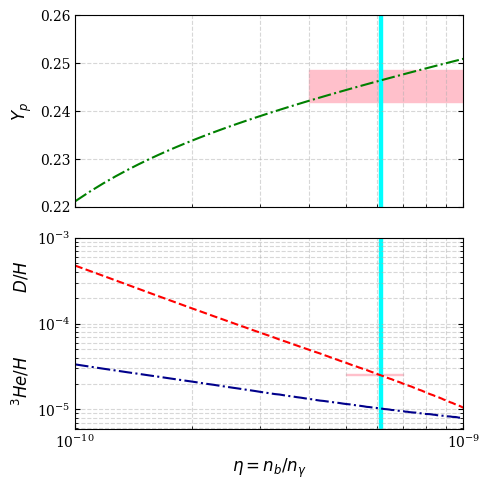

In [591]:
fig, (ax3, ax4) = subplots(2, sharex=true,figsize=(5,5))
ax3.plot(eta_val,4.002602*alpha_val,color="green","-.")
ax3.set_xlim(1.e-10,1.e-9)
ax3.set_ylim(0.22,0.26)
ax3.set_xscale("log")
ax3.set_yticks([0.23,0.24,0.25,0.26],minor=true)
#ax3.set_xlabel(L"\eta=n_{b}/n_{\gamma}",fontsize=12)
ax3.set_ylabel(L"Y_{p}",family="sans-serif",fontsize=12)
ax3.grid("True", which="both", linestyle="--", alpha=0.5)
ax3.fill_between([4e-10,1e-9],0.2419,0.2487,color="pink")
ax3.fill_betweenx([0.22,0.26],6.08e-10,6.168e-10,color="cyan")
ax3.tick_params(axis="both", which="both", direction="in", right=true)




ax4.plot(eta_val, d_val ./ h_val, color="red", linestyle="--")
ax4.plot(eta_val, he3_val ./ h_val, color="darkblue", linestyle="-.")
ax4.set_xlim(1e-10, 1e-9)
ax4.set_ylim(5.9e-6, 1e-3)
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set_yticks([1e-3, 1e-4, 1e-5])
ax4.set_xlabel(L"\eta=n_{b}/n_{\gamma}",family="sans-serif",fontsize=12)
ax4.set_ylabel(L"^{3}He/H\ \ \ \ \ \ \ \ \ \  \ \  D/H",family="sans-serif",fontsize=12)
ax4.grid("True", which="both", linestyle="--", alpha=0.5)
ax4.fill_between([5e-10, 7e-10], 2.497e-5, 2.557e-5, color="pink")
ax4.fill_betweenx([5.9e-6, 1e-3], 6.08e-10, 6.168e-10, color="cyan", label="planck")
ax4.tick_params(axis="both", which="both", direction="in", right=true)

fig.tight_layout()
fig.savefig("my_plot.png", dpi=300, format="png")
show()


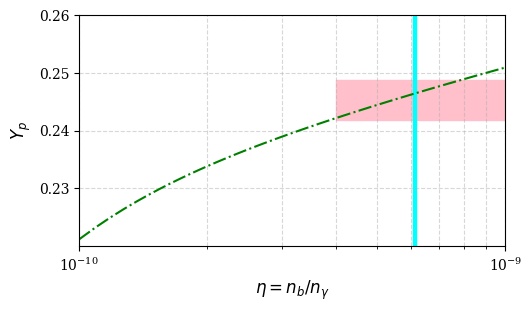

PyObject <matplotlib.collections.PolyCollection object at 0x782ef0bc92d0>

In [555]:
fig, ax2 = subplots(figsize=(5.5,3))
ax2.plot(eta_val,4.002602*alpha_val,color="green","-.")
ax2.set_xlim(1.e-10,1.e-9)
ax2.set_ylim(0.22,0.26)
ax2.set_xscale("log")
ax2.set_yticks([0.23,0.24,0.25,0.26])
ax2.set_xlabel(L"\eta=n_{b}/n_{\gamma}",fontsize=12)
ax2.set_ylabel(L"Y_{p}",fontsize=12)
ax2.grid("True", which="both", linestyle="--", alpha=0.5)
ax2.fill_between([4e-10,1e-9],0.2419,0.2487,color="pink")
ax2.fill_betweenx([0.22,0.26],6.08e-10,6.168e-10,color="cyan")

1.218e-9

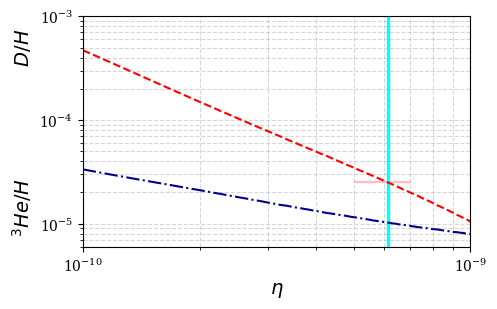

PyObject <matplotlib.collections.PolyCollection object at 0x782ef0dae530>

In [554]:
fig, ax2 = subplots(figsize=(5,3))
ax2.plot(eta_val,d_val ./ h_val,color="red","--")
ax2.plot(eta_val,he3_val ./ h_val,color="darkblue","-.")
ax2.set_xlim(1.e-10,1.e-9)
ax2.set_ylim(5.9e-6,1e-3)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_yticks([1e-3,1e-4,1e-5])
ax2.set_xlabel(L"\eta",fontsize=14)
ax2.set_ylabel(L"^{3}He/H\ \ \ \ \ \ \ \ \ \  \ \ \ \ \  \ \ \ D/H",fontsize=14)
ax2.grid("True", which="both", linestyle="--", alpha=0.5)
ax2.fill_between([5.e-10,7.e-10],2.497e-5,2.557e-5,color="pink")
ax2.fill_betweenx([5.9e-6,1e-3],6.08e-10,6.168e-10,color="cyan",label="planck")


In [592]:
xd0 = Xi(minimum(z_evolve), 3, 2, 0.511, m_p, m_n, 1875.62,6.1328e-10, 4.3524, 1)
x3h0 = Xi(minimum(z_evolve), 2, 3, 0.511, m_p, m_n, 2809.45, 6.1328e-10, 16.598, 1)
x3he0 = Xi(minimum(z_evolve), 2, 3, 0.511, m_p, m_n, 2809.431,6.1328e-10, 15.1039, 2)
x4he0 = Xi(minimum(z_evolve), 1, 4, 0.511, m_p, m_n, 3728.42,6.1328e-10, 55.37, 2)

9.759009299733473e-38

In [593]:
eta_s=6.1328e-10

6.1328e-10

In [594]:

x1_0=Xn_in(minimum(z_evolve))
x2_0=Xp_in(minimum(z_evolve))
x3_0=xd0
x4_0=x3h0
x5_0=x3he0
x6_0=x4he0


9.759009299733473e-38

In [596]:
using DifferentialEquations, BenchmarkTools
u0=[x1_0,x2_0,x3_0,x4_0,x5_0,x6_0]
tspan = (minimum(z_evolve),maximum(z_evolve))
prob = ODEProblem(dYdz, u0, tspan)
@btime solve(prob,FBDF(),reltol=1.e-6);

  104.339 ms (2522243 allocations: 45.03 MiB)


In [597]:
sol_y=solve(prob,FBDF(),reltol=1.e-6)

retcode: Success
Interpolation: 3rd order Hermite
t: 273-element Vector{Float64}:
  0.09
  0.0900000000000071
  0.0900000000524248
  0.09000000455537671
  0.09000004629145106
  0.09000146938078109
  0.0900077259899666
  0.09001674591790937
  0.09002739851179273
  0.09005690486084093
  0.09008641120988914
  0.09012052715170606
  0.09015464309352297
  ⋮
 11.540487569796621
 12.09371958486204
 12.937203890737841
 13.95525830421969
 15.20689328709247
 16.874804752354624
 19.123595077835137
 21.884690871503743
 26.68294988451389
 33.95264743667484
 45.4855019771
 50.0
u: 273-element Vector{Vector{Float64}}:
 [0.44331968205007405, 0.556680317949926, 8.55439416927989e-13, 1.1398841644929995e-25, 1.253843593076744e-25, 9.759009299733473e-38]
 [0.4433196820500263, 0.5566803179499735, 8.555354137525537e-13, 1.1398841663534406e-25, 1.2538435912163028e-25, 9.759104037533834e-38]
 [0.4433196816987226, 0.5566803183012772, 8.555355967633219e-13, 1.1398969843384582e-25, 1.2538307732312157e-25, 1.04518

In [598]:
4*0.061946045125933186

0.24778418050373274

In [599]:

# xp, xn, xd, x_3H, x_3He, x_4He
z_val = sol_y.t
xn_val = sol_y[1, :]
xp_val = sol_y[2, :]
xd_val = sol_y[3, :]
x3h_val = sol_y[4, :]
x3he_val = sol_y[5, :]
x4he_val = sol_y[6, :]


273-element Vector{Float64}:
 9.759009299733473e-38
 9.759104037533834e-38
 1.0451819556906194e-37
 4.4132493221196775e-37
 8.263380868837756e-37
 6.623211782097808e-36
 9.50503143836139e-37
 8.834444225306523e-37
 8.807079651569353e-37
 8.942802103173129e-37
 8.821294098987058e-37
 8.827525223169463e-37
 8.83411171854229e-37
 ⋮
 0.061566024932161026
 0.06156790700108637
 0.06156995839541659
 0.06157157920960479
 0.061572854933924136
 0.06157390135119217
 0.061574500493897386
 0.061574970716728156
 0.061575417852736195
 0.06157575294215156
 0.061576007718685426
 0.06157603162885668

In [ ]:
x4he_val

324-element Vector{Float64}:
 2.7030269284877673e-38
 2.7046341223428664e-38
 4.4910571204751704e-38
 3.261419866483048e-37
 5.383477768865912e-37
 3.406667737838717e-36
 6.095417089454489e-37
 5.7131744243487825e-37
 5.697591347507333e-37
 5.755955391779119e-37
 5.699320905042761e-37
 5.6988476632775604e-37
 5.698760819244953e-37
 ⋮
 0.061939544426139116
 0.06194091932640068
 0.06194225453274728
 0.06194333901187445
 0.06194412665553562
 0.06194469925155624
 0.0619451174579753
 0.06194542673403895
 0.061945666795225486
 0.06194586791578174
 0.06194604502937937
 0.061946045125933186

In [ ]:
xp_val

324-element Vector{Float64}:
 0.5322758074445384
 0.5322758074465037
 0.5322758097054472
 0.5322758862856583
 0.5322763321142231
 0.532290736455337
 0.5323501489688838
 0.5324335780956407
 0.5325282365658959
 0.5327472655904631
 0.5330115967198384
 0.5332763228929661
 0.5335095142135379
 ⋮
 0.7521609308818717
 0.7521609370378437
 0.752160887488763
 0.7521608123124494
 0.7521607246234957
 0.7521606410304668
 0.7521605715343417
 0.7521605189367963
 0.7521604828624592
 0.7521604532135419
 0.7521604051236498
 0.7521604050898363

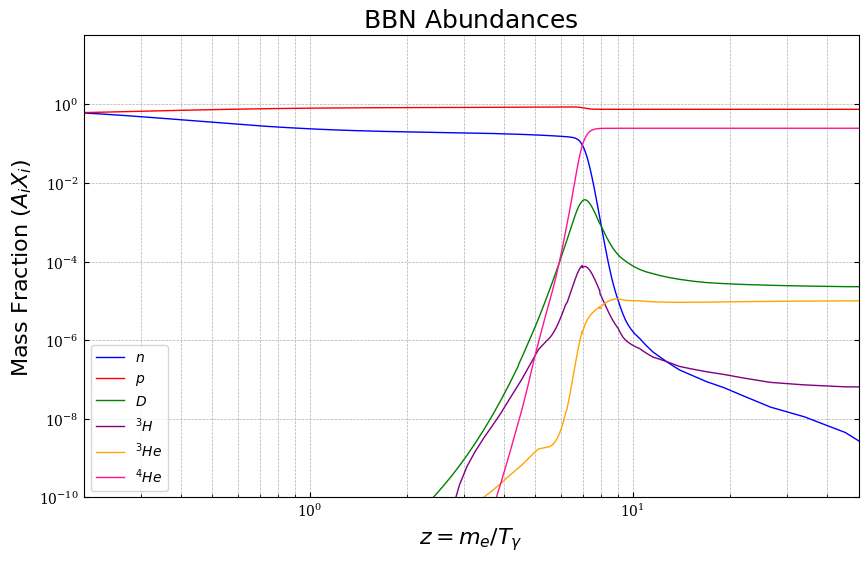

In [611]:
#=
plot(z_val, xn_val, linewidth=2, label=L"$n$")
plot(z_val, xp_val, linewidth=2, label=L"$p$")
plot(z_val, xd_val, linewidth=2, label=L"$D$")
plot(z_val, x3h_val, linewidth=2, label=L"$^{3}H$")
plot(z_val, x3he_val, linewidth=2, label=L"$^{3}He$")
plot(z_val, x4he_val, linewidth=2, label=L"$^{4}He$")

yscale("log")
xscale("log")
xlabel(L"$z=\frac{m_e}{T_{\gamma(MeV)}}$", fontsize=14)
legend()
=#
using PyPlot



# Create the figure and axis
fig, ax = subplots(figsize=(10, 6))

# Plot the data with customizations
ax.plot(
    z_val, xn_val ./ xp_val , linewidth=1, label=L"$n$", color="blue"
)
ax.plot(
    z_val, xp_val, linewidth=1, label=L"$p$", color="red"
)
ax.plot(
    z_val, xd_val  ./ xp_val, linewidth=1, label=L"$D$", color="green"
)
ax.plot(
    z_val, x3h_val ./ xp_val , linewidth=1, label=L"$^{3}H$", color="purple"
)
ax.plot(
    z_val, x3he_val ./ xp_val, linewidth=1, label=L"$^{3}He$", color="orange"
)
ax.plot(
    z_val,4.03297992538*x4he_val, linewidth=1, label=L"$^{4}He$", color="deeppink"
)

# Set scale to logarithmic
ax.set_yscale("log")
ax.set_xscale("log")

# Labeling and legend
ax.set_xlabel(L"z=m_e/T_{\gamma}}", size=16)
ax.set_ylabel(L"\mathrm{Mass\ Fraction\ }(A_{i}X_{i})", size=16)
ax.set_title(L"\mathrm{BBN\ Abundances}", size=18)

# Add a grid
ax.grid("True", which="both", linestyle="--", linewidth=0.5)
ax.tick_params(axis="both", which="both", direction="in", right=true)
ax.set_ylim(1e-10)
ax.set_xlim(0.2,50)
ax.legend()
fig.savefig("bbn.png",dpi=400)



In [ ]:
function pn_gammaD_andlo(z)
    T = m_e / z
    T_9 = mev_to_t9kelvin(T)
    # nb = 6.14e-10 * 410.73 * (T / 2.7255) ^ 3
    NA = 6.022e23
    if T_9 <= 1.5
        f = (44216. * (1 + 3.75191 * T_9 + 1.92934 * T_9^2 + 0.746503 * T_9^3 + 0.0197023 * T_9^4 + 3.00491e-6 * T_9^5) / (1 + 5.4678 * T_9 + 5.62395 * T_9^2 + 0.489312 * T_9^3 + 0.00747806 * T_9^4))
    else
        f = (1. - sqrt(T_9) * 0.8504 + T_9 * 0.4895 - T_9^(3/2) * 0.09623 + T_9 * 0.008471 * T_9 - T_9 * 2.8e-4 * T_9^(3/2)) * 47420
    end
    rate = f
    return n_b(z) * rate / NA
end


function DD_n3He_alcoc(z)
    T9 = mev_to_t9kelvin(m_e / z)
    if T9 < 0.001
        rate = 1.142e-8
    elseif 0.001 <= T9 <= 0.0015
        rate = 1.142e-8
    elseif 0.0015 < T9 <= 0.0025
        rate = 5.470e-5
    elseif 0.0025 < T9 <= 0.0035
        rate = 3.021e-3
    elseif 0.0035 < T9 <= 0.0045
        rate = 3.732e-2
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.212e-1
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.546e-1
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.505
    elseif 0.0075 < T9 <= 0.0085
        rate = 6.066
    elseif 0.0085 < T9 <= 0.0095
        rate = 1.278e1
    elseif 0.0095 < T9 <= 0.0105
        rate = 2.424e1
    elseif 0.0105 < T9 <= 0.0115
        rate = 4.237e1
    elseif 0.0115 < T9 <= 0.0125
        rate = 6.936e1
    elseif 0.0125 < T9 <= 0.0135
        rate = 1.077e2
    elseif 0.0135 < T9 <= 0.0145
        rate = 1.600e2
    elseif 0.0145 < T9 <= 0.0155
        rate = 2.291e2
    elseif 0.0155 < T9 <= 0.0170
        rate = 3.179e2
    elseif 0.0170 < T9 <= 0.0190
        rate = 5.667e2
    elseif 0.0190 < T9 <= 0.0225
        rate = 9.310e2
    elseif 0.0225 < T9 <= 0.0275
        rate = 2.504e3
    elseif 0.0275 < T9 <= 0.0350
        rate = 5.301e3
    elseif 0.0350 < T9 <= 0.0450
        rate = 1.568e4
    elseif 0.0450 < T9 <= 0.0550
        rate = 3.369e4
    elseif 0.0550 < T9 <= 0.0650
        rate = 6.013e4
    elseif 0.0650 < T9 <= 0.0750
        rate = 9.527e4
    elseif 0.0750 < T9 <= 0.0850
        rate = 1.390e5
    elseif 0.0850 < T9 <= 0.0950
        rate = 1.912e5
    elseif 0.0950 < T9 <= 0.1050
        rate = 2.513e5
    elseif 0.1050 < T9 <= 0.1150
        rate = 3.190e5
    elseif 0.1150 < T9 <= 0.1250
        rate = 3.938e5
    elseif 0.1250 < T9 <= 0.1350
        rate = 4.753e5
    elseif 0.1350 < T9 <= 0.1450
        rate = 5.631e5
    elseif 0.1450 < T9 <= 0.1550
        rate = 6.568e5
    elseif 0.1550 < T9 <= 0.1700
        rate = 7.559e5
    elseif 0.1700 < T9 <= 0.1900
        rate = 9.691e5
    elseif 0.1900 < T9 <= 0.2250
        rate = 1.200e6
    elseif 0.2250 < T9 <= 0.2750
        rate = 1.842e6
    elseif 0.2750 < T9 <= 0.3250
        rate = 2.555e6
    elseif 0.3250 < T9 <= 0.3750
        rate = 3.318e6
    elseif 0.3750 < T9 <= 0.4250
        rate = 4.119e6
    elseif 0.4250 < T9 <= 0.4750
        rate = 4.946e6
    elseif 0.4750 < T9 <= 0.5500
        rate = 5.792e6
    elseif 0.5500 < T9 <= 0.6500
        rate = 7.517e6
    elseif 0.6500 < T9 <= 0.7500
        rate = 9.260e6
    elseif 0.7500 < T9 <= 0.8500
        rate = 1.100e7
    elseif 0.8500 < T9 <= 0.9500
        rate = 1.272e7
    elseif 0.9500 < T9 <= 1.1250
        rate = 1.442e7
    elseif 1.1250 < T9 <= 1.3750
        rate = 1.850e7
    elseif 1.3750 < T9 <= 1.6250
        rate = 2.235e7
    elseif 1.6250 < T9 <= 1.8750
        rate = 2.595e7
    elseif 1.8750 < T9 <= 2.2500
        rate = 2.932e7
    elseif 2.2500 < T9 <= 2.7500
        rate = 3.546e7
    elseif 2.7500 < T9 <= 3.2500
        rate = 4.093e7
    elseif 3.2500 < T9 <= 3.7500
        rate = 4.585e7
    elseif 3.7500 < T9 <= 4.5000
        rate = 5.031e7
    elseif 4.5000 < T9 <= 5.5000
        rate = 5.816e7
    elseif 5.5000 < T9 <= 6.5000
        rate = 6.488e7
    elseif 6.5000 < T9 <= 7.5000
        rate = 7.072e7
    elseif 7.5000 < T9 <= 8.5000
        rate = 7.583e7
    elseif 8.5000 < T9 <= 9.5000
        rate = 8.037e7
    elseif 9.5000 < T9 <= 10.0000
        rate = 8.437e7
    else
        rate = 0.0
    end
    rate = rate
    return n_b(z) * rate / NA
end


function DD_p3H_alcoc(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)
    NA = 6.022e23
    if T9 < 0.001
        rate = 1.173e-8
    elseif 0.001 <= T9 <= 0.0015
        rate = 1.173e-8
    elseif 0.0015 < T9 <= 0.0025
        rate = 5.609e-5
    elseif 0.0025 < T9 <= 0.0035
        rate = 3.092e-3
    elseif 0.0035 < T9 <= 0.0045
        rate = 3.814e-2
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.257e-1
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.707e-1
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.549
    elseif 0.0075 < T9 <= 0.0085
        rate = 6.164
    elseif 0.0085 < T9 <= 0.0095
        rate = 1.297e1
    elseif 0.0095 < T9 <= 0.0105
        rate = 2.458e1
    elseif 0.0105 < T9 <= 0.0115
        rate = 4.290e1
    elseif 0.0115 < T9 <= 0.0125
        rate = 7.016e1
    elseif 0.0125 < T9 <= 0.0135
        rate = 1.088e2
    elseif 0.0135 < T9 <= 0.0145
        rate = 1.615e2
    elseif 0.0145 < T9 <= 0.0155
        rate = 2.310e2
    elseif 0.0155 < T9 <= 0.0170
        rate = 3.202e2
    elseif 0.0170 < T9 <= 0.0190
        rate = 5.698e2
    elseif 0.0190 < T9 <= 0.0225
        rate = 9.343e2
    elseif 0.0225 < T9 <= 0.0275
        rate = 2.502e3
    elseif 0.0275 < T9 <= 0.0350
        rate = 5.276e3
    elseif 0.0350 < T9 <= 0.0450
        rate = 1.549e4
    elseif 0.0450 < T9 <= 0.0550
        rate = 3.307e4
    elseif 0.0550 < T9 <= 0.0650
        rate = 5.868e4
    elseif 0.0650 < T9 <= 0.0750
        rate = 9.246e4
    elseif 0.0750 < T9 <= 0.0850
        rate = 1.343e5
    elseif 0.0850 < T9 <= 0.0950
        rate = 1.837e5
    elseif 0.0950 < T9 <= 0.1050
        rate = 2.404e5
    elseif 0.1050 < T9 <= 0.1150
        rate = 3.039e5
    elseif 0.1150 < T9 <= 0.1250
        rate = 3.737e5
    elseif 0.1250 < T9 <= 0.1350
        rate = 4.493e5
    elseif 0.1350 < T9 <= 0.1450
        rate = 5.304e5
    elseif 0.1450 < T9 <= 0.1550
        rate = 6.165e5
    elseif 0.1550 < T9 <= 0.1700
        rate = 7.072e5
    elseif 0.1700 < T9 <= 0.1900
        rate = 9.011e5
    elseif 0.1900 < T9 <= 0.2250
        rate = 1.110e6
    elseif 0.2250 < T9 <= 0.2750
        rate = 1.682e6
    elseif 0.2750 < T9 <= 0.3250
        rate = 2.309e6
    elseif 0.3250 < T9 <= 0.3750
        rate = 2.974e6
    elseif 0.3750 < T9 <= 0.4250
        rate = 3.663e6
    elseif 0.4250 < T9 <= 0.4750
        rate = 4.371e6
    elseif 0.4750 < T9 <= 0.5500
        rate = 5.089e6
    elseif 0.5500 < T9 <= 0.6500
        rate = 6.543e6
    elseif 0.6500 < T9 <= 0.7500
        rate = 8.001e6
    elseif 0.7500 < T9 <= 0.8500
        rate = 9.448e6
    elseif 0.8500 < T9 <= 0.9500
        rate = 1.087e7
    elseif 0.9500 < T9 <= 1.1250
        rate = 1.228e7
    elseif 1.1250 < T9 <= 1.3750
        rate = 1.565e7
    elseif 1.3750 < T9 <= 1.6250
        rate = 2.882e7
    elseif 1.6250 < T9 <= 1.8750
        rate = 2.181e7
    elseif 1.8750 < T9 <= 2.2500
        rate = 2.461e7
    elseif 2.2500 < T9 <= 2.7500
        rate = 2.976e7
    elseif 2.7500 < T9 <= 3.2500
        rate = 3.440e7
    elseif 3.2500 < T9 <= 3.7500
        rate = 3.863e7
    elseif 3.7500 < T9 <= 4.5000
        rate = 4.251e7
    elseif 4.5000 < T9 <= 5.5000
        rate = 4.946e7
    elseif 5.5000 < T9 <= 6.5000
        rate = 5.552e7
    elseif 6.5000 < T9 <= 7.5000
        rate = 6.077e7
    elseif 7.5000 < T9 <= 8.5000
        rate = 6.529e7
    elseif 8.5000 < T9 <= 9.5000
        rate = 6.912e7
    elseif 9.5000 < T9 <= 10.0000
        rate = 7.228e7
    else
        rate = 0.0
    end
    rate = n_b(z) * rate / NA
    return rate
end



DD_p3H_alcoc (generic function with 1 method)

In [ ]:
"""
function DD_n3He_alcoc(z)
    T = m_e / z
    T_9 = mev_to_t9kelvin(T)
    NA = 6.022e23
    rate = (T_9^(-2/3)) * exp(-T_9^(-1/3)) * (
        -1.84664e6 + 1.22986e7 * T_9^(1/3) - 1.3761e7 * T_9^(2/3) - 6.11628e7 * T_9
        + 1.3329e8 * T_9^(4/3) - 1.24333e7 * T_9^(5/3) - 2.72404e7 * T_9^2
        + 8.52947e6 * T_9^(7/3) + 2.2519e6 * T_9^(8/3) - 2.31204e6 * T_9^3
        - 294342 * T_9^(10/3) + 911550 * T_9^(11/3) - 252211 * T_9^4
    )

    return (n_b(z) * rate / NA)
end


function DD_p3H_alcoc(z)
    T = m_e / z
    T_9 = mev_to_t9kelvin(T)
    rhob = 2.12e-4 * T_9^3
    t9 = mev_to_t9kelvin(m_e / z)
    NA = 6.022e23
    t913 = t9^(1/3)
    t923 = t9^(2/3)
    t943 = t9^(4/3)
    t953 = t9^(5/3)

    rate = 3.91889e8 * t9^(-2/3) * exp(-4.2586 / t913) * (
        1 + 0.309233 * t913 - 0.337260 * t923 +
        2.51922 * t9 - 2.79097 * t943 + 2.16082 * t953 -
        0.976181 * t9^2 + 0.210883 * t943 * t9 -
        0.0169027 * t953 * t9 + 7.845538e-6 * t9^3
    )

    return (n_b(z) * rate / NA)
end
"""

"function DD_n3He_alcoc(z)\n    T = m_e / z\n    T_9 = mev_to_t9kelvin(T)\n    NA = 6.022e23\n    rate = (T_9^(-2/3)) * exp(-T_9^(-1/3)) * (\n        -1.84664e6 + 1.22986e7 * T_9^(1/3) - 1.3761e7 * T_9^(2/3) - 6.11628e7 * T_9\n        + 1.3329e8 * T_9^(4/3) - 1.24333e7 * T_9^(5" ⋯ 480 bytes ⋯ "p(-4.2586 / t913) * (\n        1 + 0.309233 * t913 - 0.337260 * t923 +\n        2.51922 * t9 - 2.79097 * t943 + 2.16082 * t953 -\n        0.976181 * t9^2 + 0.210883 * t943 * t9 -\n        0.0169027 * t953 * t9 + 7.845538e-6 * t9^3\n    )\n\n    return (n_b(z) * rate / NA)\nend\n"

In [ ]:
function gammaD_pn(z)
    term1 = (Xp_in(z) * Xn_in(z)) / Xi(z, 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10,6.86, 1)
    reverse_rate = term1 * pn_gammaD_andlo(z)
    return reverse_rate
end


gammaD_pn (generic function with 1 method)

In [ ]:

function threegamma_1two(sigma_v_ab, T_9, A1, A2, A3, ga, gb, gc, Q)
    c_gamma = 9.8686 * 10^9 * T_9^(3/2) * (A1 * A2 / A3) * (ga * gb / gc) * exp(-11.605 * Q / T_9)
    ngamma_sigma_v_cgamma = sigma_v_ab * c_gamma
    return ngamma_sigma_v_cgamma
end


threegamma_1two (generic function with 2 methods)

In [ ]:
"""
function gammaD_pn(z)
    value1 = pn_gammaD(z)
    T_9 = mev_to_t9kelvin(z)
    A1 = 1.00727
    A2 = 1.00866
    A3 = 2.01410
    ga = 2
    gb = 2
    gc = 3
    Q = 1.7135810198702273
    value1 = value1
    rate1r = threegamma_1two(value1, T_9, A1, A2, A3, ga, gb, gc, Q)
    return rate1r
end
"""

"function gammaD_pn(z)\n    value1 = pn_gammaD(z)\n    T_9 = mev_to_t9kelvin(z)\n    A1 = 1.00727\n    A2 = 1.00866\n    A3 = 2.01410\n    ga = 2\n    gb = 2\n    gc = 3\n    Q = 1.7135810198702273\n    value1 = value1\n    rate1r = threegamma_1two(value1, T_9, A1, A2, A3, ga, gb, gc, Q)\n    return rate1r\nend\n"

In [ ]:
function xp_dot(z, xn, xp, xd)
    value = (lambda_np(z) * xn - lambda_pn(z) * xp + (gammaD_pn(z) * xd - pn_gammaD_andlo(z) * xp * xn)
              + ((DD_p3H_alcoc(z) * xd ^ 2) / 2 )) * dt_dz(z)
    return value
end

function xn_dot(z, xn, xp, xd)
    value = (lambda_pn(z) * xp - lambda_np(z) * xn + (gammaD_pn(z) * xd - pn_gammaD_andlo(z) * xp * xn)
             + ((DD_n3He_alcoc(z) * xd ^ 2) / 2 )) * dt_dz(z)
    return value
end

function xd_dot(z, xn, xp, xd)
    value = ((pn_gammaD_andlo(z) * xp * xn - gammaD_pn(z) * xd) - 2 * (((DD_p3H_alcoc(z) * xd ^ 2) / 2 ) + ((DD_n3He_alcoc(z) * xd ^ 2) / 2))) * dt_dz(z)
    return value
end

function x4he_dot(z, xd)
    value = ((((DD_p3H_alcoc(z) * xd ^ 2) / 2 ) + ((DD_n3He_alcoc(z) * xd ^ 2) / 2))) * dt_dz(z)
    return value
end

x4he_dot (generic function with 1 method)

In [ ]:

function small_network(u, p, z)
    xn, xp, xd, x4he = u
    dx_n = xn_dot(z,u[1],u[2],u[3])  # Define the equation for dx/dt here based on x, y, and t
    dx_p = xp_dot(z,u[1],u[2],u[3])
    dx_d = xd_dot(z,u[1],u[2],u[3])
    dx_4he=x4he_dot(z,u[3])
    [dx_n,dx_p,dx_d,dx_4he] # Define the equation for dy/dt here based on x, y, and t
end



small_network (generic function with 1 method)

In [ ]:

x1_0=Xn_in(minimum(z_evolve))
x2_0=Xp_in(minimum(z_evolve))
x3_0=Xi(minimum(z_evolve), 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10, 6.86, 1)
x4_h0=Xi(minimum(z_evolve), 1, 4, 0.511, 938.27, 940.6, 3728.42, 6.13832e-10, 53.32, 2)


1.9840403110691048e-19

In [ ]:
xd0 = Xi(minimum(z_evolve), 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10, 6.86, 1)
x3h0 = Xi(minimum(z_evolve), 2, 3, 0.511, 938.27, 940.6, 2809.45, 6.13832e-10, 16.63, 1)
x3he0 = Xi(minimum(z_evolve), 2, 3, 0.511, 938.27, 940.6, 2809.431, 6.13832e-10, 13.11, 2)
x4he0 = Xi(minimum(z_evolve), 1, 4, 0.511, 938.27, 940.6, 3728.42, 6.13832e-10, 53.32, 2)

2.42419955103104e-38

In [ ]:
x4_h0

2.42419955103104e-38

In [ ]:
z_iterate = []
for i in znu
    if mev_to_t9kelvin(m_e / i) < 10
        push!(z_iterate, i)
    end
end


In [ ]:
Pkg.add("DifferentialEquations")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [ ]:
using Pkg
Pkg.add("Sundials")
using Sundials

   Resolving package versions...
    Updating `~/.julia/environments/v1.9/Project.toml`
  [c3572dad] + Sundials v4.19.3
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [ ]:
Pkg.add("LSODA")

   Resolving package versions...
   Installed LSODA_jll ─ v0.1.2+0
   Installed LSODA ───── v0.7.4
    Updating `~/.julia/environments/v1.9/Project.toml`
  [7f56f5a3] + LSODA v0.7.4
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [7f56f5a3] + LSODA v0.7.4
  [aae0fff6] + LSODA_jll v0.1.2+0
Precompiling project...
  ✓ LSODA_jll
  ✓ LSODA
  2 dependencies successfully precompiled in 5 seconds. 205 already precompiled.


In [ ]:

using DifferentialEquations, BenchmarkTools
u20=[x1_0,x2_0,x3_0,x4_h0]
tspan = (minimum(znu),maximum(znu))
prob2 = ODEProblem(small_network, u20, tspan)
@btime solve(prob2,FBDF(),reltol=1e-8);


  57.864 ms (806040 allocations: 15.85 MiB)


In [ ]:
sol2=solve(prob2,FBDF(),reltol=1e-8)

retcode: Success
Interpolation: 3rd order Hermite
t: 302-element Vector{Float64}:
  0.051099997600057595
  0.0510999976000647
  0.05109999760860968
  0.05109999790494081
  0.05109999965001331
  0.05110006918887746
  0.0511003808030817
  0.05110083908682259
  0.05110137906405512
  0.05110266466132885
  0.05110452584718817
  0.051106722974920776
  0.05110892010265338
  ⋮
  6.966197616736859
  7.370477741255392
  7.961317207243992
  8.552156673232592
  9.520370863319163
 10.863239760423852
 12.703373683987536
 15.41139085322958
 19.536636404897614
 25.858480588538413
 36.29605865620184
 50.63151395438075
u: 302-element Vector{Vector{Float64}}:
 [0.46772419255546166, 0.5322758074445384, 1.9342860429778275e-12, 2.42419955103104e-38]
 [0.46772419255447895, 0.5322758074455212, 1.9342861472551853e-12, 2.42419955103104e-38]
 [0.467724191372667, 0.532275808627333, 1.9342861464345677e-12, 2.42419955103104e-38]
 [0.4677241503892084, 0.5322758496107917, 1.9342861129864763e-12, 2.42419955103104e-38]

In [ ]:
z_values2 = sol2.t
xn_values2 = sol2[1, :]
xp_values2= sol2[2, :]
xd_values2= sol2[3, :]
x4he_values2=sol2[4, :]

302-element Vector{Float64}:
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955103104e-38
 2.424199551030089e-38
 2.4241995510334485e-38
 2.4241995510336573e-38
 2.424199551033936e-38
 2.424199551021205e-38
 2.4241995510162353e-38
 2.424199551010104e-38
 2.424199551007522e-38
 ⋮
 0.0991134975783411
 0.09911516901397428
 0.09911647737578021
 0.09911739247647997
 0.09911837938657593
 0.09911917871591264
 0.09911980997120222
 0.09912033466726156
 0.09912074561710442
 0.09912106585791643
 0.0991213241327635
 0.09912147651771855

In [ ]:
x4he_values2

302-element Vector{Float64}:
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955103104e-38
 2.424199551030089e-38
 2.4241995510334485e-38
 2.4241995510336573e-38
 2.424199551033936e-38
 2.424199551021205e-38
 2.4241995510162353e-38
 2.424199551010104e-38
 2.424199551007522e-38
 ⋮
 0.0991134975783411
 0.09911516901397428
 0.09911647737578021
 0.09911739247647997
 0.09911837938657593
 0.09911917871591264
 0.09911980997120222
 0.09912033466726156
 0.09912074561710442
 0.09912106585791643
 0.0991213241327635
 0.09912147651771855

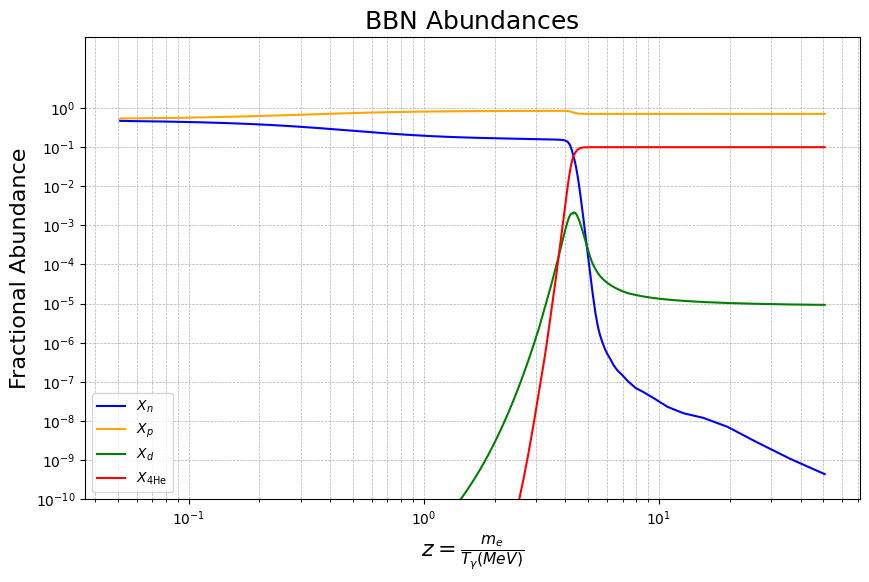

In [ ]:
# Assuming you have already defined your data arrays z_values2, xn_values2, xp_values2, xd_values2, x4he_values2
using PyPlot

# Assuming you have already defined your data arrays z_values2, xn_values2, xp_values2, xd_values2, x4he_values2

# Increase the figure size
fig, ax = subplots(figsize=(10, 6))  # Adjust the size as needed

# Plot the data with labels and custom colors
ax.plot(z_values2, xn_values2, label=L"X_n", color="blue")
ax.plot(z_values2, xp_values2, label=L"X_p", color="orange")
ax.plot(z_values2, xd_values2, label=L"X_d", color="green")
ax.plot(z_values2, x4he_values2, label=L"X_{4\mathrm{He}}", color="red")

# Set x and y scales to logarithmic
ax.set_xscale("log")
ax.set_yscale("log")

# Add labels and title with LaTeX formatting
ax.set_xlabel(L"z=\frac{m_e}{T_{\gamma}(MeV)}", size=16)
ax.set_ylabel("Fractional Abundance", size=16)
ax.set_title(L"\mathrm{BBN\ Abundances}", size=18)

# Add a grid
ax.grid("True", which="both", linestyle="--", linewidth=0.5)
ax.set_ylim(1e-10)
ax.set_yticks([1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1])

# Add a legend
ax.legend()

# Display the plot
show()




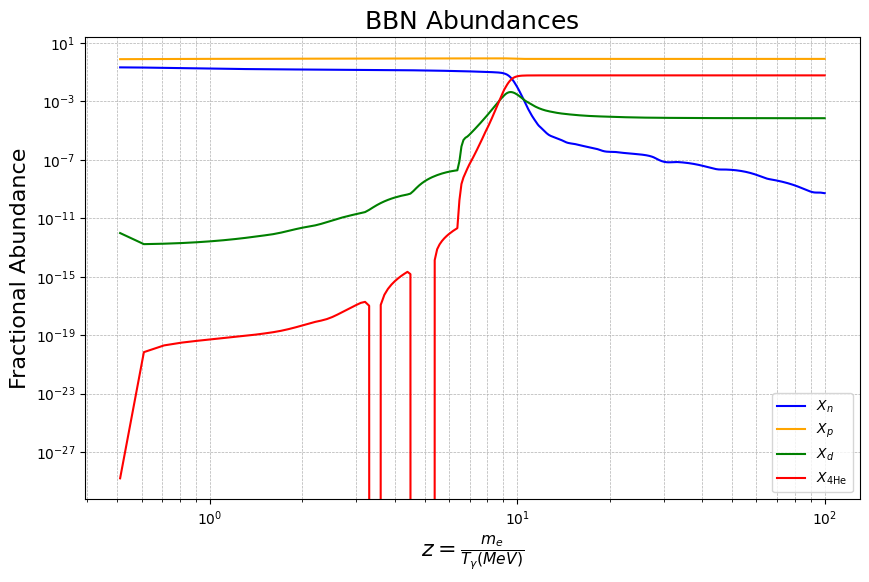